In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\ANIKET\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("featured_data.csv")
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [3]:
df[df.total_sqft / df.bhk < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
57,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
67,other,1350.0,7.0,85.0,8,6296.296296
69,other,500.0,3.0,100.0,3,20000.000000


In [4]:
df2 = df[~(df.total_sqft / df.bhk < 300)]
df2.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889


In [5]:
df2.shape

(12456, 6)

In [6]:
def remove_price_per_sqft_outliers(df):
    df_output = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft >= mean-std) & (sub_df.price_per_sqft <= mean+std)]
        df_output = pd.concat([df_output, reduced_df], ignore_index = True)
    return df_output

In [7]:
df3 = remove_price_per_sqft_outliers(df2)
df3.shape

(10245, 6)

In [8]:
def plot_scatter_per_location(df, location):
    bhk1 = df[(df.location == location) & (df.bhk == 1)]
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = [15, 10])
    plt.scatter(bhk1.total_sqft, bhk1.price, c = 'green', label = '1bhk')
    plt.scatter(bhk2.total_sqft, bhk2.price, c = 'blue', label = '2bhk')
    plt.scatter(bhk3.total_sqft, bhk3.price, c = 'red', label = '3bhk')
    plt.xlabel('Total Area in Square Feet')
    plt.ylabel('Total Price in lakh Rupees')
    plt.title(location)
    plt.legend()

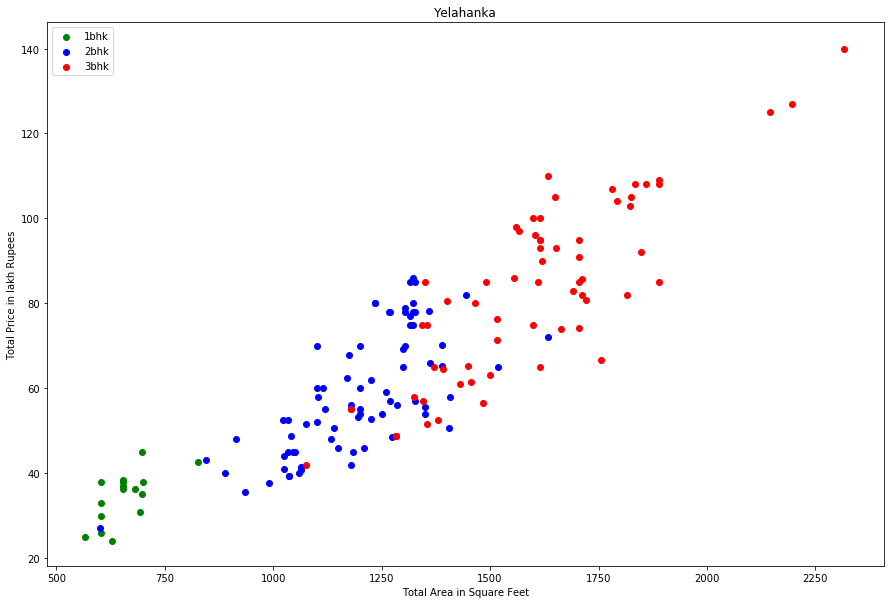

In [11]:
plot_scatter_per_location(df3, 'Yelahanka')

In [22]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                new_excludes = bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, new_excludes)
    return df.drop(exclude_indices, axis = 'index')

In [23]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7331, 6)

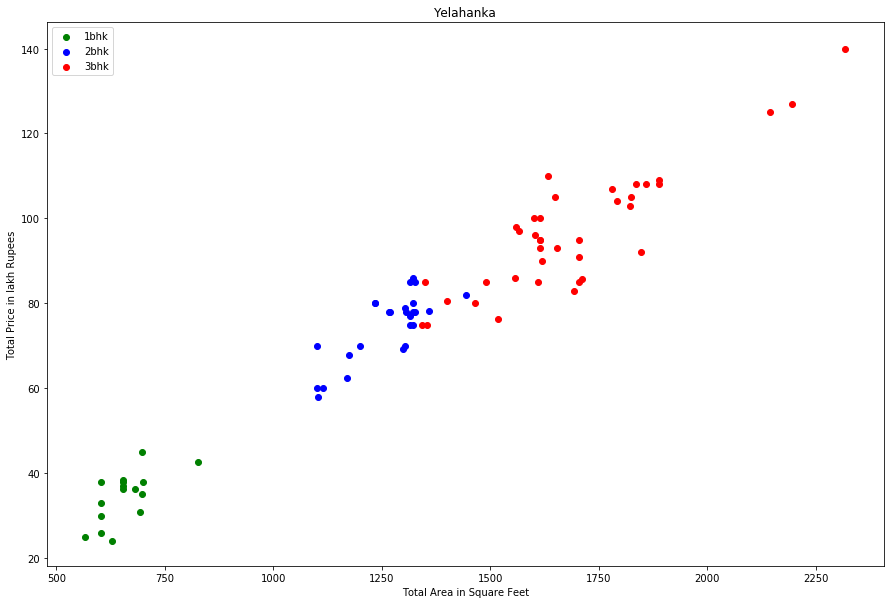

In [24]:
plot_scatter_per_location(df4, 'Yelahanka')

(array([ 560., 3580., 2301.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <a list of 10 Patch objects>)

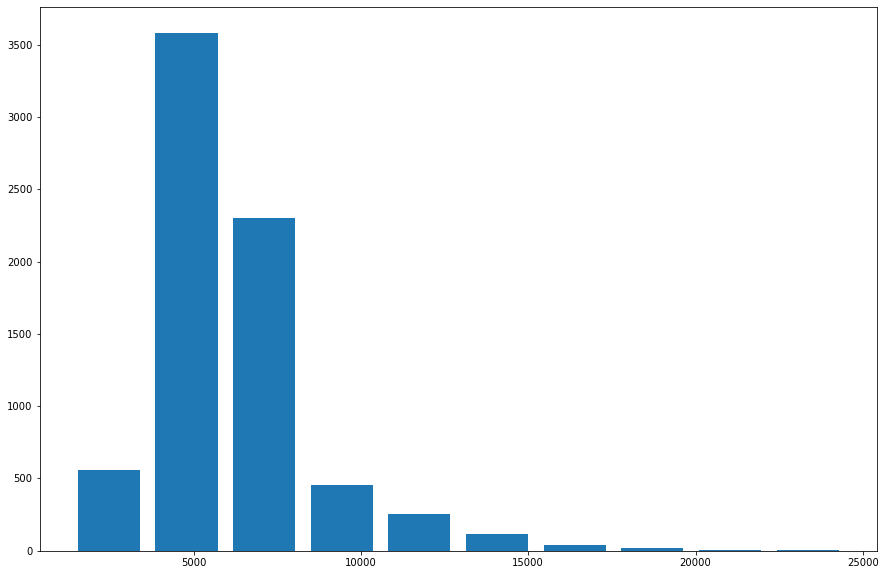

In [25]:
plt.figure(figsize = [15, 10])
plt.hist(df4.price_per_sqft, rwidth = 0.8)

(array([4.770e+03, 1.763e+03, 6.760e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

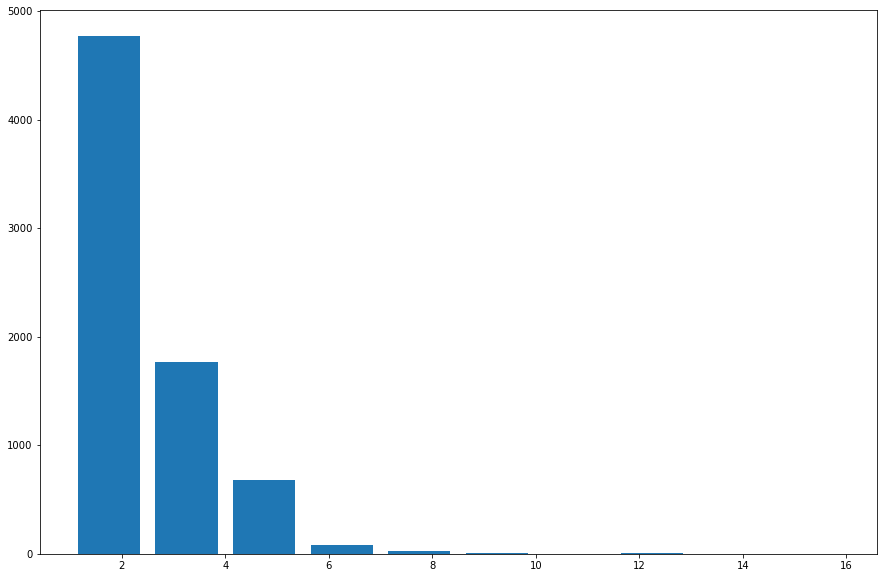

In [26]:
plt.figure(figsize = [15, 10])
plt.hist(df4.bath, rwidth = 0.8)

In [27]:
df4[df4.bath >= df4.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
49,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
50,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
542,Arekere,2710.0,6.0,142.0,4,5239.852399
592,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
824,Bannerghatta,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...
9917,other,6652.0,6.0,510.0,4,7666.867108
10038,other,600.0,4.0,70.0,2,11666.666667
10093,other,5656.0,5.0,499.0,3,8822.489392
10206,other,6652.0,6.0,660.0,4,9921.828022


In [28]:
df5 = df4[df4.bath < df4.bhk + 2]
df5.shape

(7253, 6)

In [29]:
df6 = df5.drop('price_per_sqft', axis = 1)
df6.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [30]:
df6.shape

(7253, 5)

In [31]:
df6.to_csv("outlier_free_data.csv", index = False)